# AIS

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

pd.set_option('display.max_columns', None)  # Set to display all columns

In [2]:
# Load Data
df_agroFood = pd.read_csv('Agrofood_co2_emission.csv', encoding='latin1')
df_foodEmissions = pd.read_csv('Total Emissions Per Country (2000-2020).csv', encoding='latin1')
df_globalFood = pd.read_csv('global-food.csv', encoding='latin1')
df_fao = pd.read_csv('fao_global_food_waste_2000_2021.csv', encoding='latin1')

# 1) Dataset agroFood

In [3]:
df_agroFood

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature Â°C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.997000,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.853900,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.492900,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.055900,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.126900,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.07440,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.77590,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.51070,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.82090,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [4]:
df_agroFood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [5]:
# Remover dados de anos inferiores a 2010
df_agroFood = df_agroFood[df_agroFood['Year'] >= 2010]

# Rename algumas colunas
df_agroFood = df_agroFood.rename(columns={'Area': 'Country', 'total_emission': 'Emissions_food'})
df_agroFood

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


<Axes: >

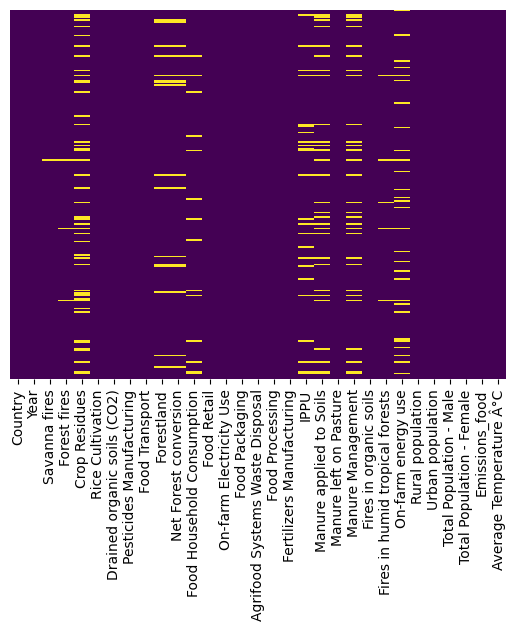

In [6]:
sns.heatmap(df_agroFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
nan_counts = df_agroFood.isna().sum()
nan_counts

Country                              0
Year                                 0
Savanna fires                       11
Forest fires                        33
Crop Residues                      492
Rice Cultivation                     0
Drained organic soils (CO2)          0
Pesticides Manufacturing             0
Food Transport                       0
Forestland                         176
Net Forest conversion              176
Food Household Consumption         154
Food Retail                          0
On-farm Electricity Use              0
Food Packaging                       0
Agrifood Systems Waste Disposal      0
Food Processing                      0
Fertilizers Manufacturing            0
IPPU                               264
Manure applied to Soils            322
Manure left on Pasture               0
Manure Management                  322
Fires in organic soils               0
Fires in humid tropical forests     55
On-farm energy use                 319
Rural population         

In [8]:
columns_with_nan = (nan_counts > 0).sum()
print("Number of columns with NaN values:", columns_with_nan)

Number of columns with NaN values: 11


In [9]:
# ver quais os paises que têm maior número de Nans

unique_countries = df_agroFood['Country'].unique()

nan_counts_per_country = []
for country in unique_countries:
    nan_count = df_agroFood[df_agroFood['Country'] == country].isna().sum().sum()
    nan_counts_per_country.append(nan_count)

df_nan_counts = pd.DataFrame({
    'Country': unique_countries,
    'Number of NaN Values': nan_counts_per_country
})

df_nan_counts_sorted = df_nan_counts.sort_values(by='Number of NaN Values', ascending=False)

print(df_nan_counts_sorted)

                          Country  Number of NaN Values
40                Channel Islands                    99
92                       Holy See                    77
134                        Monaco                    66
218  United States Virgin Islands                    66
86                           Guam                    66
..                            ...                   ...
91                          Haiti                     0
93                       Honduras                     0
94                        Hungary                     0
95                        Iceland                     0
228                      Zimbabwe                     0

[229 rows x 2 columns]


### Remoção dos países com maior número de Nans

é melhor so meter os números Nan a 0.0 ou a desconhecido

In [10]:

#to_drop = ['Channel Islands', 'Holy See', 'Monaco', 'United States Virgin Islands', 'Guam','Anguilla']
#df_agroFood = df_agroFood[~df_agroFood['Country'].isin(to_drop)]

#df_agroFood

In [11]:
brasil_data = df_agroFood.loc[df_agroFood['Country'] == 'Western Sahara']
print(brasil_data)


             Country  Year  Savanna fires  Forest fires  Crop Residues  \
6859  Western Sahara  2010            0.0           0.0            NaN   
6860  Western Sahara  2011            0.0           0.0            NaN   
6861  Western Sahara  2012            0.0           0.0            NaN   
6862  Western Sahara  2013            0.0           0.0            NaN   
6863  Western Sahara  2014            0.0           0.0            NaN   
6864  Western Sahara  2015            0.0           0.0            NaN   
6865  Western Sahara  2016            0.0           0.0            NaN   
6866  Western Sahara  2017            0.0           0.0            NaN   
6867  Western Sahara  2018            0.0           0.0            NaN   
6868  Western Sahara  2019            0.0           0.0            NaN   
6869  Western Sahara  2020            0.0           0.0            NaN   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
6859        926.342278        

### Tratar dos Nans

In [12]:
# dei drop de todos os Crop Residues que têm o valor de Nan, uma vez que era o que tinha mais

df_agroFood = df_agroFood.dropna(subset=['Crop Residues'])
df_agroFood


,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


<Axes: >

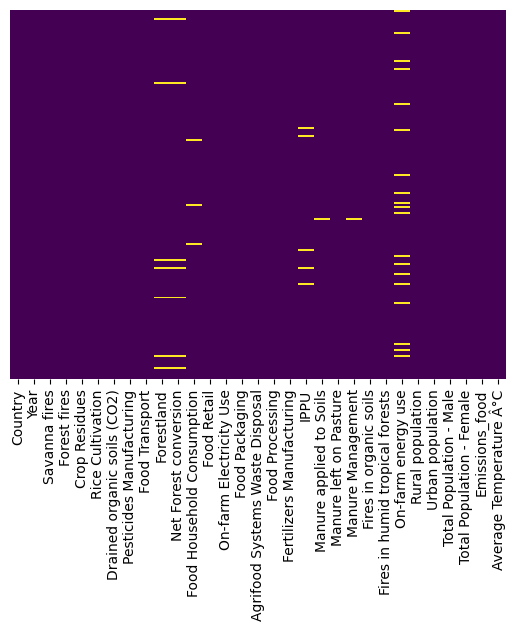

In [13]:
sns.heatmap(df_agroFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# deixei a 0.0 porque é elemento neutro


df_agroFood['Forest fires'].fillna(0.0, inplace=True)
df_agroFood

/tmp/ipykernel_552192/710669086.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agroFood['Forest fires'].fillna(0.0, inplace=True)
/tmp/ipykernel_552192/710669086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agroFood['Forest fires'].fillna(0.0, inplace=True)


,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [15]:
nan_rows = df_agroFood[df_agroFood['Forestland'].isnull()]
nan_rows

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
237,Antigua and Barbuda,2010,0.0000,0.0000,0.0033,246.407276,0.0,0.0,18.6787,NaN,NaN,22.9466,25.2091,4.5109,172.179779,33.8650,252.21419,1807.613681,14.2211,1.3328,5.5206,1.4430,0.0,0.0000,18.6202,69824.0,24837.0,40597.0,45097.0,2624.766227,1.138083
238,Antigua and Barbuda,2011,0.0000,0.0000,0.0037,246.407276,0.0,0.0,18.6043,NaN,NaN,22.8777,26.5557,4.9006,172.179779,33.9258,252.21419,1807.613681,14.6170,1.4024,5.4951,1.4655,0.0,0.0000,17.5481,71116.0,24603.0,41141.0,45588.0,2625.810827,0.587667
239,Antigua and Barbuda,2012,0.0000,0.0000,0.0036,246.407276,0.0,0.0,19.0611,NaN,NaN,18.5690,31.0106,4.8747,172.179779,33.9515,252.21419,1807.613681,15.3244,1.4024,5.4951,1.4655,0.0,0.0000,17.4658,72074.0,24703.0,41653.0,46022.0,2627.038627,0.712250
240,Antigua and Barbuda,2013,0.0000,0.0000,0.0037,246.407276,0.0,1.0,19.2444,NaN,NaN,18.7092,29.6146,4.3569,172.179779,34.0346,252.21419,1807.613681,16.0746,1.3653,5.4891,1.4496,0.0,0.0000,19.0825,73026.0,24798.0,42096.0,46401.0,2628.839427,0.801917
241,Antigua and Barbuda,2014,0.0000,0.0000,0.0037,246.407276,0.0,1.0,19.7043,NaN,NaN,19.3684,31.2736,4.3081,172.179779,34.1024,252.21419,1807.613681,16.8820,1.3838,5.4722,1.4534,0.0,0.0000,21.5416,73984.0,24891.0,42488.0,46748.0,2634.908427,0.715333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6741,Vanuatu,2016,0.0000,0.0000,0.0655,246.407276,0.0,4.0,11.3598,NaN,NaN,3.4101,30.4229,1.3823,80.607732,12.1160,252.21419,2240.392965,4.6875,7.0815,67.2770,60.4940,0.0,0.0000,9.3664,202634.0,67768.0,142613.0,140606.0,3031.285163,1.156000
6742,Vanuatu,2017,0.2003,8.6132,0.0666,246.407276,0.0,4.0,9.9916,NaN,NaN,3.5608,34.3980,1.4742,80.607732,12.4267,252.21419,3052.546276,4.8193,7.0411,70.6094,60.8040,0.0,8.6132,8.1971,206733.0,69511.0,146105.0,144135.0,3866.590974,1.081083
6743,Vanuatu,2018,0.0000,0.0000,0.0670,246.407276,0.0,3.0,14.0470,NaN,NaN,3.5329,39.5637,1.2697,80.607732,12.7343,252.21419,2240.392965,4.8911,7.3476,68.8907,61.9989,0.0,0.0000,11.0087,210816.0,71301.0,149615.0,147683.0,3047.973763,0.626583
6744,Vanuatu,2019,0.0000,0.0000,0.0675,246.407276,0.0,3.0,12.3254,NaN,NaN,3.5657,44.4501,1.3915,80.607732,12.9409,252.21419,2240.392965,4.8876,6.9856,61.3448,59.6191,0.0,0.0000,9.7323,214878.0,73139.0,153149.0,151256.0,3039.932663,0.941167


In [16]:
nan_rows_forestland = df_agroFood[df_agroFood['Forestland'].isnull()]
unique_countries_with_null_forestland = nan_rows_forestland['Country'].unique()
unique_countries_with_null_forestland

array(['Antigua and Barbuda', 'China, Taiwan Province of',
       'North Macedonia', 'Palestine', 'Saint Kitts and Nevis',
       'United Arab Emirates', 'Vanuatu'], dtype=object)

In [17]:
df_agroFood['Net Forest conversion'].fillna(0.0, inplace=True)

/tmp/ipykernel_552192/1911233006.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agroFood['Net Forest conversion'].fillna(0.0, inplace=True)
/tmp/ipykernel_552192/1911233006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agroFood['Net Forest conversion'].fillna(0.0, inplace=True)


In [18]:
df_agroFood['Forestland'].fillna(0.0, inplace=True)

/tmp/ipykernel_552192/2039269286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agroFood['Forestland'].fillna(0.0, inplace=True)
/tmp/ipykernel_552192/2039269286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agroFood['Forestland'].fillna(0.0, inplace=True)


In [19]:
#nan_rows_crop = df_agroFood[df_agroFood['Crop Residues'].isnull()]
#unique_countries_with_null_crop = nan_rows_crop['Country'].unique()
#unique_countries_with_null_crop

In [20]:
nan_rows = df_agroFood[df_agroFood['Food Household Consumption'].isnull()]
nan_rows

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
2392,Gambia,2010,94.3489,0.0000,28.6539,607.874400,0.0000,10.000000,7.1341,0.0000,527.6271,NaN,47.5232,2.224100,212.033652,192.2806,267.887283,599.422429,9.9049,7.0176,237.4015,26.6956,0.0,0.0000,21.9406,750273.0,941876.0,958562.0,978713.0,2899.969864,1.412417
2393,Gambia,2011,105.1059,0.0000,15.3190,296.535500,0.0000,13.000000,7.8370,0.0000,527.5351,NaN,47.8854,2.031100,212.033652,195.1471,267.887283,599.422429,10.1051,5.7257,218.1101,22.8312,0.0,0.0000,21.8340,761696.0,984667.0,989446.0,1008766.0,2568.345564,0.908500
2394,Gambia,2012,84.9701,0.0000,19.6796,448.705200,0.0000,13.000000,7.4504,0.0000,527.5351,NaN,49.0282,1.286000,212.033652,198.0648,267.887283,599.422429,10.1052,4.8637,203.1002,19.8085,0.0,0.0000,23.6410,773029.0,1029096.0,1021199.0,1039815.0,2690.581364,0.947250
2395,Gambia,2013,81.6637,0.0000,19.5975,468.377300,0.0000,13.000000,7.8019,0.0000,527.5351,NaN,50.5999,0.622700,212.033652,201.1233,267.887283,599.422429,10.4054,4.8994,220.6173,20.5896,0.0,0.0000,20.4157,784258.0,1075066.0,1053493.0,1071377.0,2726.592164,1.028333
2396,Gambia,2014,62.9252,0.0000,17.2325,467.714000,0.0000,14.000000,8.6454,0.0000,527.5351,NaN,55.6764,1.337100,212.033652,203.9570,267.887283,599.422429,10.5056,5.4727,241.7283,22.7439,0.0,0.0000,40.7748,795364.0,1122488.0,1085941.0,1103078.0,2759.591364,1.190500
2397,Gambia,2015,43.0081,0.0000,20.4946,601.135900,0.0000,14.000000,8.6982,0.0000,527.5351,NaN,62.1886,1.253900,212.033652,207.1890,267.887283,599.422429,10.3058,5.7706,248.0812,23.6674,0.0,0.0000,41.9210,806309.0,1171281.0,1118341.0,1134792.0,2894.592764,1.207167
2398,Gambia,2016,84.5489,0.0000,17.3352,464.990400,0.0000,14.000000,8.8210,0.0000,527.7191,NaN,72.0184,1.361600,212.033652,210.4290,267.887283,599.422429,10.3059,5.6473,231.4744,22.6972,0.0,0.0000,43.6888,817075.0,1221426.0,1150704.0,1166502.0,2794.380564,1.710417
2399,Gambia,2017,80.5076,0.0000,14.9013,464.665800,0.0000,13.000000,8.9512,0.0000,527.7191,NaN,81.4645,1.794700,212.033652,213.9771,267.887283,599.422429,10.3061,5.9085,239.4038,23.5622,0.0,0.0000,44.9265,827654.0,1272914.0,1182968.0,1198214.0,2810.431764,1.635083
2400,Gambia,2018,70.9264,0.4167,11.5013,287.136900,0.0000,14.000000,8.4872,0.0000,527.7191,NaN,93.2112,3.075900,212.033652,217.2581,267.887283,599.422429,10.4063,6.0373,243.5043,23.9852,0.0,0.4167,39.0320,838035.0,1325730.0,1215115.0,1229801.0,2636.457964,1.099333
2401,Gambia,2019,63.8544,0.0000,13.7457,458.640000,0.0000,13.000000,8.7861,0.0000,527.7191,NaN,103.6379,2.664400,212.033652,220.6929,267.887283,599.422429,10.8064,6.1179,245.0219,24.1877,0.0,0.0000,39.5869,848212.0,1379863.0,1247342.0,1261541.0,2817.804664,1.331500


In [21]:
nan_rows_consumption = df_agroFood[df_agroFood['Food Household Consumption'].isnull()]
unique_countries_with_null_consumption = nan_rows_consumption['Country'].unique()
unique_countries_with_null_consumption

array(['Gambia', 'Liberia', 'Namibia'], dtype=object)

In [22]:
#df_agroFood = df_agroFood.dropna(subset=['Food Household Consumption'])

df_agroFood['Food Household Consumption'].fillna(0.0, inplace=True)
df_agroFood

/tmp/ipykernel_552192/2630271260.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agroFood['Food Household Consumption'].fillna(0.0, inplace=True)
/tmp/ipykernel_552192/2630271260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agroFood['Food Household Consumption'].fillna(0.0, inplace=True)


,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [23]:
nan_rows = df_agroFood[df_agroFood['IPPU'].isnull()]
nan_rows

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
2206,Faroe Islands,2010,0.0000,0.0000,0.0181,246.407276,235.9155,0.000000,11.501200,-0.1057,0.0000,0.0784,7.582900,17.004663,134.463835,11.905200,386.192572,2005.792129,NaN,1.1953,5.6387,1.6254,0.0,0.0000,237.0931,28680.0,19870.0,25139.0,23271.0,3302.308576,0.084000
2207,Faroe Islands,2011,0.0000,0.0000,0.0187,246.407276,235.9155,0.000000,11.774200,-0.1465,0.0000,0.0773,6.571200,17.004663,134.463835,12.009400,386.192572,2005.792129,NaN,1.1994,5.7097,1.6201,0.0,0.0000,202.9233,28636.0,19972.0,25106.0,23279.0,3267.532776,1.114500
2208,Faroe Islands,2012,0.0000,0.0000,0.0191,246.407276,235.9155,0.000000,11.538500,-0.1465,0.0000,0.0775,6.831600,17.004663,134.463835,12.079000,386.192572,2005.792129,NaN,1.1986,5.7776,1.6019,0.0,0.0000,226.7557,28603.0,20063.0,25084.0,23307.0,3291.508976,0.413833
2209,Faroe Islands,2013,0.0000,0.0000,0.0202,246.407276,235.9155,0.000000,12.642700,-0.1465,0.0000,0.0739,7.808600,17.004663,134.463835,12.146900,386.192572,2005.792129,NaN,1.2071,5.7853,1.6198,0.0,0.0000,264.8852,28584.0,20163.0,25070.0,23349.0,3331.819176,0.707000
2210,Faroe Islands,2014,0.0000,0.0000,0.0213,246.407276,235.9155,0.000000,11.917200,-0.1465,0.0000,0.0667,7.097400,17.004663,134.463835,12.173000,386.192572,2005.792129,NaN,1.2237,5.9357,1.6253,0.0,0.0000,234.2259,28572.0,20270.0,25050.0,23414.0,3299.915676,1.697417
2211,Faroe Islands,2015,0.0000,0.0000,0.0177,246.407276,235.9155,0.000000,12.276400,-0.1465,0.0000,0.0594,7.044100,17.004663,134.463835,12.189800,386.192572,2005.792129,NaN,1.2219,5.9855,1.6090,0.0,0.0000,252.7420,28577.0,20388.0,25209.0,23607.0,3318.775276,0.899417
2212,Faroe Islands,2016,0.0000,0.0000,0.0192,246.407276,235.9155,0.000000,13.160900,-0.0688,0.0000,0.0523,7.224100,17.004663,134.463835,12.214600,386.192572,2005.792129,NaN,1.2244,6.0636,1.5957,0.0,0.0000,245.0979,28598.0,20519.0,25570.0,23930.0,3312.359876,0.953750
2213,Faroe Islands,2017,0.0000,0.0000,0.0191,246.407276,235.9155,0.000000,13.738300,-0.0688,0.0000,0.0462,7.209900,17.004663,134.463835,12.233100,386.192572,2005.792129,NaN,1.2063,5.8934,1.5887,0.0,0.0000,305.0357,28630.0,20660.0,25959.0,24272.0,3372.677876,1.264417
2214,Faroe Islands,2018,0.0000,0.0000,0.0191,246.407276,235.9155,0.000000,13.539800,-0.0688,0.0000,0.0355,6.993400,17.004663,134.463835,12.247700,386.192572,2005.792129,NaN,1.2057,5.9360,1.5771,0.0,0.0000,308.7494,28672.0,20817.0,26360.0,24596.0,3376.010876,0.972417
2215,Faroe Islands,2019,0.0000,0.0000,0.0191,246.407276,235.7537,0.000000,14.642800,-0.0688,0.0000,0.0338,6.540700,17.004663,134.463835,12.272200,386.192572,2005.792129,NaN,1.2028,5.9601,1.5645,0.0,0.0000,288.8544,28709.0,20983.0,26749.0,24932.0,3356.635776,0.810167


In [24]:
nan_rows_ippu = df_agroFood[df_agroFood['IPPU'].isnull()]
unique_countries_with_null_ippu = nan_rows_ippu['Country'].unique()
unique_countries_with_null_ippu

array(['Faroe Islands', 'French Polynesia', 'New Caledonia', 'Palestine',
       'Puerto Rico'], dtype=object)

In [25]:
#df_agroFood = df_agroFood.dropna(subset=['IPPU'])

In [26]:
#nan_rows = df_agroFood[df_agroFood['Manure applied to Soils'].isnull()]
#nan_rows

df_agroFood['IPPU'].fillna(0.0, inplace=True)
df_agroFood

/tmp/ipykernel_552192/2941594378.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agroFood['IPPU'].fillna(0.0, inplace=True)
/tmp/ipykernel_552192/2941594378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agroFood['IPPU'].fillna(0.0, inplace=True)


,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [27]:
nan_rows_manure = df_agroFood[df_agroFood['Manure applied to Soils'].isnull()]
unique_countries_with_null_manure = nan_rows_manure['Country'].unique()
unique_countries_with_null_manure

array(['Maldives'], dtype=object)

In [28]:
df_agroFood['Manure applied to Soils'].fillna(0.0, inplace=True)
df_agroFood
#df_agroFood = df_agroFood.dropna(subset=['Manure applied to Soils'])

/tmp/ipykernel_552192/3655372520.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agroFood['Manure applied to Soils'].fillna(0.0, inplace=True)
/tmp/ipykernel_552192/3655372520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agroFood['Manure applied to Soils'].fillna(0.0, inplace=True)


,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [29]:
df_agroFood['Manure Management'].fillna(0.0, inplace=True)
df_agroFood
#df_agroFood = df_agroFood.dropna(subset=['Manure Management'])

/tmp/ipykernel_552192/3289359798.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agroFood['Manure Management'].fillna(0.0, inplace=True)
/tmp/ipykernel_552192/3289359798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agroFood['Manure Management'].fillna(0.0, inplace=True)


,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [30]:
nan_rows = df_agroFood[df_agroFood['On-farm energy use'].isnull()]
nan_rows

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0,413.6467,815.360000,0.0,81.610850,468.2530,121.9016,0.0,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.3799,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0,335.0379,823.200000,0.0,81.610850,478.8137,-246.2191,0.0,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.4927,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0,445.5958,803.600000,0.0,107.386444,530.8213,-246.2191,0.0,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.4433,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0,455.0727,803.600000,0.0,76.061874,391.0777,-246.2191,0.0,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.9814,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0,473.4174,862.400000,0.0,49.782873,304.1804,-246.2191,0.0,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.6394,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6524,United Arab Emirates,2016,0.0000,0.0,0.2703,246.407276,0.0,157.514510,3791.1797,0.0000,0.0,2790.4628,3046.3392,1803.1835,4.005400,2237.6990,5.899600,3473.7394,17796.5054,17.7196,569.6338,82.5873,0.0,0.0,NaN,1300961.0,7968651.0,6365662.0,2628601.0,36023.146787,1.163000
6525,United Arab Emirates,2017,0.0000,0.0,0.6668,246.407276,0.0,156.033255,4125.2819,0.0000,0.0,2838.5546,3142.5031,1797.7236,4.072000,2251.5493,6.169500,2850.1723,18218.3252,18.1025,581.8390,84.8195,0.0,0.0,NaN,1292709.0,8107436.0,6392484.0,2675811.0,36322.219831,1.513917
6526,United Arab Emirates,2018,0.0000,0.0,0.3232,246.407276,0.0,156.033255,4121.9583,0.0000,0.0,2746.7604,3150.5756,1868.3592,3.907400,2267.6792,6.045500,2907.4924,17839.1733,18.1249,587.6419,85.1656,0.0,0.0,NaN,1285972.0,8255643.0,6418331.0,2721838.0,36005.647431,1.591583
6527,United Arab Emirates,2019,0.0000,0.0,1.0560,246.407276,0.0,156.675105,3906.3457,0.0000,0.0,2279.6675,3169.6975,1857.0328,3.756800,2284.8789,6.103400,2951.8171,19211.2691,18.4319,584.4666,87.2943,0.0,0.0,NaN,1279098.0,8402990.0,6443813.0,2767844.0,36764.899981,1.210417


In [31]:
nan_rows_energy = df_agroFood[df_agroFood['On-farm energy use'].isnull()]
unique_countries_with_null_energy = nan_rows_energy['Country'].unique()
unique_countries_with_null_energy

array(['Afghanistan', 'Bahrain', 'Burkina Faso', 'Cameroon',
       'Democratic Republic of the Congo', 'Fiji', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Madagascar', 'Niger', 'Oman', 'Paraguay',
       'Puerto Rico', 'Saudi Arabia', 'Togo', 'Turkmenistan',
       'United Arab Emirates'], dtype=object)

In [32]:
df_agroFood['On-farm energy use'].fillna(0.0, inplace=True)
df_agroFood
#df_agroFood = df_agroFood.dropna(subset=['On-farm energy use'])

/tmp/ipykernel_552192/4001513169.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agroFood['On-farm energy use'].fillna(0.0, inplace=True)
/tmp/ipykernel_552192/4001513169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agroFood['On-farm energy use'].fillna(0.0, inplace=True)


,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,0.0000,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,0.0000,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,0.0000,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,0.0000,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [33]:
nan_counts = df_agroFood.isna().sum()
columns_with_nan = (nan_counts > 0).sum()
print("Number of columns with NaN values:", columns_with_nan)

Number of columns with NaN values: 0


<Axes: >

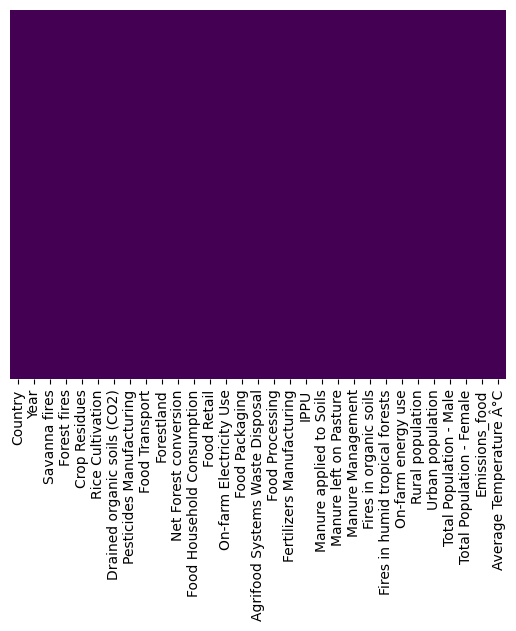

In [34]:
sns.heatmap(df_agroFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
df_agroFood

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,0.0000,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,0.0000,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,0.0000,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,0.0000,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


## Ver Países

In [36]:
unique_countries = df_agroFood['Country'].unique()
print(unique_countries)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India

# 2) Dataset foodEmissions

In [37]:
df_foodEmissions

,ï»¿Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,5.200000e-01,5.267000e-01,8.200000e-01,9.988000e-01,8.225000e-01,1.182100e+00,1.027700e+00,1.242600e+00,8.869000e-01,1.392000e+00,1.274200e+00,1.032100e+00,1.372600e+00,1.401800e+00,1.458400e+00,1.242400e+00,1.194000e+00,1.061700e+00,8.988000e-01,1.217600e+00,1.317000e+00
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,1.170000e-01,1.185000e-01,1.845000e-01,2.247000e-01,1.851000e-01,2.660000e-01,2.312000e-01,2.796000e-01,1.996000e-01,3.132000e-01,2.867000e-01,2.322000e-01,3.088000e-01,3.154000e-01,3.281000e-01,2.795000e-01,2.687000e-01,2.389000e-01,2.022000e-01,2.740000e-01,2.963000e-01
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,6.370000e-01,6.452000e-01,1.004500e+00,1.223500e+00,1.007500e+00,1.448100e+00,1.258900e+00,1.522200e+00,1.086500e+00,1.705100e+00,1.560900e+00,1.264300e+00,1.681500e+00,1.717300e+00,1.786500e+00,1.522000e+00,1.462700e+00,1.300500e+00,1.101100e+00,1.491600e+00,1.613300e+00
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,1.688070e+02,1.709884e+02,2.661975e+02,3.242195e+02,2.669995e+02,3.837498e+02,3.336093e+02,4.033749e+02,2.879099e+02,4.518647e+02,4.136467e+02,3.350379e+02,4.455958e+02,4.550727e+02,4.734174e+02,4.033181e+02,3.876130e+02,3.446447e+02,2.917838e+02,3.952689e+02,4.275284e+02
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,1.688070e+02,1.709884e+02,2.661975e+02,3.242195e+02,2.669995e+02,3.837498e+02,3.336093e+02,4.033749e+02,2.879099e+02,4.518647e+02,4.136467e+02,3.350379e+02,4.455958e+02,4.550727e+02,4.734174e+02,4.033181e+02,3.876130e+02,3.446447e+02,2.917838e+02,3.952689e+02,4.275284e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58760,OECD,All sectors without LULUCF,Emissions (CO2),kilotonnes,1.334328e+07,1.326305e+07,1.332979e+07,1.352237e+07,1.366651e+07,1.369481e+07,1.369710e+07,1.379770e+07,1.358338e+07,1.273838e+07,1.311391e+07,1.289801e+07,1.270146e+07,1.274243e+07,1.261664e+07,1.253301e+07,1.241227e+07,1.243658e+07,1.254684e+07,1.217070e+07,1.088919e+07
58761,OECD,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),kilotonnes,3.941893e+05,3.882647e+05,4.176531e+05,4.392191e+05,4.672796e+05,5.080909e+05,5.511406e+05,5.902422e+05,6.271651e+05,6.774160e+05,7.641415e+05,7.759070e+05,7.826597e+05,8.006688e+05,8.326775e+05,8.546258e+05,8.741566e+05,8.884415e+05,9.049044e+05,9.172806e+05,9.208261e+05
58762,OECD,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2.145052e+06,2.126567e+06,2.093083e+06,2.038232e+06,2.047953e+06,2.008645e+06,2.039932e+06,2.035230e+06,2.016547e+06,1.965772e+06,1.931536e+06,1.980459e+06,1.971959e+06,1.922551e+06,1.934854e+06,1.924370e+06,1.880327e+06,1.915982e+06,1.923635e+06,1.882769e+06,1.825476e+06
58763,OECD,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,8.535273e+05,8.496131e+05,8.400758e+05,8.124412e+05,8.328157e+05,8.123489e+05,8.257754e+05,8.312711e+05,7.887649e+05,7.878419e+05,7.864163e+05,8.344119e+05,8.490201e+05,8.204159e+05,8.325680e+05,8.289014e+05,8.218071e+05,8.400423e+05,8.349622e+05,8.118189e+05,8.009744e+05


In [38]:
df_foodEmissions = df_foodEmissions.rename(columns={'ï»¿Area': 'Area'})

<Axes: >

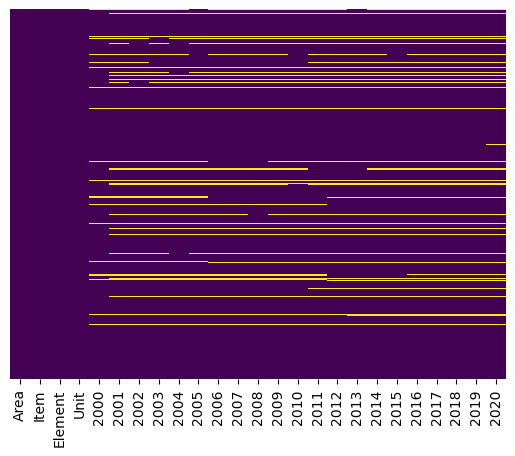

In [39]:
sns.heatmap(df_foodEmissions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
df_foodEmissions = pd.melt(df_foodEmissions, id_vars=['Area', 'Item', 'Element', 'Unit'], var_name='Year', value_name='Value')
df_foodEmissions

,Area,Item,Element,Unit,Year,Value
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,2000,5.200000e-01
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,2000,1.170000e-01
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,2000,6.370000e-01
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,2000,1.688070e+02
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,2000,1.688070e+02
...,...,...,...,...,...,...
1234060,OECD,All sectors without LULUCF,Emissions (CO2),kilotonnes,2020,1.088919e+07
1234061,OECD,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),kilotonnes,2020,9.208261e+05
1234062,OECD,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2020,1.825476e+06
1234063,OECD,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,2020,8.009744e+05


<Axes: >

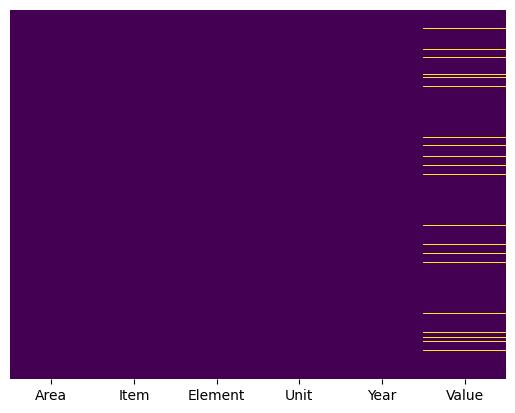

In [41]:
sns.heatmap(df_foodEmissions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
# make a rename
df_foodEmissions = df_foodEmissions.rename(columns={"Area": "Country", "Value": "Food_emissions"})
df_foodEmissions = df_foodEmissions.sort_values(by="Country")
df_foodEmissions['Year'] = df_foodEmissions['Year'].astype('int64')
df_foodEmissions = df_foodEmissions[df_foodEmissions['Year'] >= 2010]
df_foodEmissions

,Country,Item,Element,Unit,Year,Food_emissions
1116734,Afghanistan,LULUCF,Emissions (N2O),kilotonnes,2019,NaN
1116735,Afghanistan,LULUCF,Emissions (CO2),kilotonnes,2019,154.6574
1116736,Afghanistan,LULUCF,Emissions (CO2),kilotonnes,2019,NaN
1116737,Afghanistan,LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2019,0.0000
1116738,Afghanistan,LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,2019,0.0000
...,...,...,...,...,...,...
1049446,Zimbabwe,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,2017,108.6262
1049444,Zimbabwe,Crop Residues,Emissions (N2O),kilotonnes,2017,0.4099
1049443,Zimbabwe,Crop Residues,Indirect emissions (N2O),kilotonnes,2017,0.0753
1049442,Zimbabwe,Crop Residues,Direct emissions (N2O),kilotonnes,2017,0.3346


### Remoção dos paises com maior numeros de Nans

Não foi a melhor aproach

In [43]:
# contar a Area que tem maior numero de nans

unique_countries = df_foodEmissions['Country'].unique()

nan_counts_per_country = []
for country in unique_countries:
    nan_count = df_foodEmissions[df_foodEmissions['Country'] == country].isna().sum().sum()
    nan_counts_per_country.append(nan_count)

df_nan_counts = pd.DataFrame({
    'Area': unique_countries,
    'Number of NaN Values': nan_counts_per_country
})

df_nan_counts_sorted = df_nan_counts.sort_values(by='Number of NaN Values', ascending=False)

print(df_nan_counts_sorted)


                                  Area  Number of NaN Values
257                               USSR                  1958
277                       Yugoslav SFR                  1925
220              Serbia and Montenegro                  1892
66                      Czechoslovakia                  1892
84                        Ethiopia PDR                  1859
..                                 ...                   ...
45                      Cayman Islands                     0
47                     Central America                     0
48                        Central Asia                     0
171                      New Caledonia                     0
140  Low Income Food Deficit Countries                     0

[280 rows x 2 columns]


In [44]:
# drop das regioes, tenho que ver se os nomes dos países é o mesmo, porque penso que não o seja

#to_drop = ['USSR','Yugoslav SFR','Serbia and Montenegro','Czechoslovakia','Ethiopia PDR','Pacific Islands Trust Territory ','Belgium-Luxembourg','Sudan (former)']
#df_foodEmissions = df_foodEmissions[~df_foodEmissions['Country'].isin(to_drop)]

#df_foodEmissions

### Tratar dos Nans

In [45]:
# contar quantos Nans existem, se for menos do 30% dar drop, neste caso

In [46]:
df_foodEmissions.nunique()

Country              280
Item                  42
Element                9
Unit                   1
Year                  11
Food_emissions    284591
dtype: int64

In [47]:
nan_counts = df_foodEmissions.isna().sum()
nan_counts

Country               0
Item                  0
Element               0
Unit                  0
Year                  0
Food_emissions    49771
dtype: int64

In [48]:
df_foodEmissions = df_foodEmissions.dropna(subset=['Food_emissions'])

In [ ]:
sns.heatmap(df_foodEmissions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

In [ ]:
unique_countries = df_foodEmissions['Country'].unique()
print(unique_countries)

# Comparação de países

In [ ]:
countries_df1 = df_agroFood['Country'].unique()
countries_df2 = df_foodEmissions['Country'].unique()
common_countries = np.intersect1d(countries_df1, countries_df2)
print("Países comuns a ambos os datasets:", common_countries)


In [ ]:
exclusive_df2 = np.setdiff1d(countries_df2, countries_df1)
print("Países exclusivos de df2:", exclusive_df2)


# 3) Dataset globalFood

In [ ]:
df_globalFood

In [ ]:
df_globalFood = df_globalFood[df_globalFood['Year'] >= 2010]
df_globalFood

In [ ]:
sns.heatmap(df_globalFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# contar o numeros de nans em cada coluna
nan_counts = df_globalFood.isna().sum()
nan_counts


In [ ]:
to_drop = ['Product', 'Yield (kg/animal)','Producing or slaughtered animals','Producing or slaughtered animals per capita','Animal feed (t)',
           'feed__tonnes__per_capita', 'Animal feed per capita (kg)', 'Other uses (t)', 'other_uses__tonnes__per_capita', 'Other uses per capita (kg)']
df_globalFood = df_globalFood.drop(to_drop, axis=1)
df_globalFood

In [ ]:
sns.heatmap(df_globalFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# quais linhas têm maior número de Nans

nan_counts = df_globalFood.isnull().sum(axis=1)
nan_counts_19 = nan_counts[nan_counts == 19]

# Para obter os índices das linhas que têm exatamente 19 NaNs
rows_with_19_nans = nan_counts_19.index.tolist()

print(rows_with_19_nans)




In [ ]:
# drop das linhas com maior número de Nans, o numero que eu tirei foi até 19

df_globalFood.drop([182, 365, 700, 2181, 2303, 2333, 2577, 3583, 3644, 3705, 4191, 4313, 6569, 6721, 7056, 7855, 7977, 8065, 8599, 9288, 9349, 9410, 9593, 10170, 11307, 11612, 11744, 11805, 11866, 11927, 13664, 13725, 13786,
                   12109, 12110,60, 121, 243, 304, 426, 487, 548, 578, 639, 761, 822, 852, 913, 963, 964, 965, 966, 967, 968, 969, 970, 971, 974, 1035, 1096, 1126, 1148, 1248, 1309, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1419, 1480, 1510, 1571, 1632, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1754, 1815, 1865, 1866, 1867, 1868, 1876, 1937, 1998, 2059, 2120, 2242, 2394, 2455, 2516, 2638, 2699, 2760, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2882, 2943, 2973, 3034, 3095, 3124, 3217, 3278, 3339, 3400, 3461, 3522, 3766, 3827, 3888, 3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3917, 3947, 4008, 4037, 4130, 4252, 4374, 4435, 4496, 4603, 4664, 4725, 4755, 4816, 4877, 4938, 4999, 5106, 5167, 5228, 5289, 5350, 5411, 5472, 5533, 5594, 5655, 5716, 5777, 5838, 5899, 5960, 6021, 6082, 6143, 6204, 6265, 6295, 6356, 6417, 6478, 6508, 6630, 6660, 6782, 6843, 6904, 6965, 6995, 7117, 7178, 7200, 7321, 7382, 7443, 7504, 7565, 7626, 7733, 7794, 7916, 7993, 7994, 7995, 7996, 7997, 7998, 7999, 8000, 8001, 8004, 8095, 8156, 8172, 8233, 8294, 8355, 8416, 8466, 8467, 8468, 8469, 8470, 8471, 8472, 8473, 8474, 8477, 8538, 8660, 8770, 8831, 8892, 8953, 9014, 9064, 9065, 9066, 9067, 9068, 9069, 9070, 9071, 9072, 9073, 9074, 9075, 9136, 9197, 9227, 9471, 9532, 9654, 9715, 9732, 9733, 9734, 9735, 9736, 9737, 9738, 9739, 9740, 9741, 9742, 9743, 9804, 9865, 9926, 9987, 10048, 10109, 10231, 10281, 10282, 10283, 10284, 10285, 10286, 10287, 10288, 10289, 10290, 10291, 10292, 10338, 10339, 10340, 10341, 10342, 10343, 10344, 10345, 10346, 10349, 10456, 10486, 10547, 10608, 10669, 10730, 10791, 10852, 10913, 10974, 10990, 11065, 11126, 11176, 11177, 11178, 11179, 11180, 11181, 11182, 11183, 11184, 11185, 11186, 11187, 11216, 11246, 11368, 11418, 11419, 11420, 11421, 11422, 11423, 11424, 11425, 11426, 11427, 11428, 11429, 11490, 11551, 11673, 11674, 11675, 11676, 11677, 11678, 11679, 11680, 11683, 11988, 12049, 12059, 12171, 12232, 12293, 12354, 12415, 12445, 12506, 12567, 12628, 12678, 12679, 12680, 12681, 12682, 12683, 12684, 12685, 12686, 12687, 12688, 12689, 12750, 12811, 12872, 12902, 12952, 12953, 12954, 12955, 12956, 12957, 12958, 12959, 12960, 12961, 12962, 12963, 13055, 13085, 13146, 13207, 13268, 13329, 13390, 13420, 13481, 13542, 13603, 13847, 13908, 14000, 14061,7844, 7845, 7846, 7847, 7848, 7849, 7850, 7851, 7852, 7853, 7854, 10159, 10160, 10161, 10162, 10163, 10164, 10165, 10166, 10167, 10168, 10169], inplace=True)


In [ ]:
# contar a Area que tem maior numero de nans

unique_countries = df_globalFood['Country'].unique()

nan_counts_per_country = []
for country in unique_countries:
    nan_count = df_globalFood[df_globalFood['Country'] == country].isna().sum().sum()
    nan_counts_per_country.append(nan_count)

df_nan_counts = pd.DataFrame({
    'Area': unique_countries,
    'Number of NaN Values': nan_counts_per_country
})

df_nan_counts_sorted = df_nan_counts.sort_values(by='Number of NaN Values', ascending=False)

print(df_nan_counts_sorted)

In [ ]:
df_globalFood

In [ ]:
sns.heatmap(df_globalFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df_globalFood['production__tonnes__per_capita'].fillna(0.0, inplace=True)
df_globalFood['Production per capita (kg)'].fillna(0.0, inplace=True)
df_globalFood['area_harvested__ha__per_capita'].fillna(0.0, inplace=True)
df_globalFood['Land Use per capita (mÂ²)'].fillna(0.0, inplace=True)
df_globalFood['Production (t)'].fillna(0.0, inplace=True)
df_globalFood['Yield (t/ha)'].fillna(0.0, inplace=True)
df_globalFood['Exports (t)'].fillna(0.0, inplace=True)
df_globalFood['exports__tonnes__per_capita'].fillna(0.0, inplace=True)
df_globalFood['Exports per capita (kg)'].fillna(0.0, inplace=True)
df_globalFood['Land Use (ha)'].fillna(0.0, inplace=True)

df_globalFood

In [ ]:
sns.heatmap(df_globalFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
countries_df1 = df_agroFood['Country'].unique()
countries_df2 = df_globalFood['Country'].unique()
common_countries = np.intersect1d(countries_df1, countries_df2)
print("Países comuns a ambos os datasets:", common_countries)

In [ ]:
countries_df1 = df_agroFood['Country'].unique()
countries_df2 = df_foodEmissions['Country'].unique()
common_countries = np.setdiff1d(countries_df2, countries_df1)
print("Países comuns a ambos os datasets:", common_countries)

In [ ]:
df_fao

In [ ]:
sns.heatmap(df_fao.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df_fao

In [ ]:
df_fao = df_fao.rename(columns={"country": "Country", "year": "Year"})
#df_fao = df_fao.drop(['m49_code', 'region', 'cpc_code', 'url', 'notes'], axis=1)
df_fao = df_fao[df_fao['Year'] >= 2010]
df_fao

In [ ]:
# drop das linhas com bués Nans
to_drop = ['region','loss_quantity','treatment','cause_of_loss','sample_size','reference','notes']

df_fao = df_fao.drop(to_drop, axis=1)

df_fao

In [ ]:
sns.heatmap(df_fao.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [68]:
# tratar dos Nans na activity

df_fao['activity'].fillna('Unknown', inplace=True)
df_fao['method_data_collection'].fillna('Unknown', inplace=True)
df_fao['url'].fillna('Unknown', inplace=True)


/tmp/ipykernel_424575/1224735670.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fao['activity'].fillna('Unknown', inplace=True)
/tmp/ipykernel_424575/1224735670.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [69]:
df_fao

,m49_code,Country,cpc_code,commodity,Year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection,url
7,108,Burundi,0111,Wheat,2020,3.50,3.5,"Shelling, Threshing",Farm,Modelled Estimates,https://www.aphlis.net/en/page/20/data-tables#...
8,108,Burundi,0111,Wheat,2020,4.87,4.87,Storage,Farm,Modelled Estimates,https://www.aphlis.net/en/page/20/data-tables#...
9,108,Burundi,0111,Wheat,2020,2.50,2.5,Transportation,Farm,Modelled Estimates,https://www.aphlis.net/en/page/20/data-tables#...
10,108,Burundi,0111,Wheat,2020,4.43,4.43,"Drying, Harvesting",Harvest,Modelled Estimates,https://www.aphlis.net/en/page/20/data-tables#...
11,108,Burundi,0112,Maize (corn),2020,4.00,4,Drying,Farm,Modelled Estimates,https://www.aphlis.net/en/page/20/data-tables#...
...,...,...,...,...,...,...,...,...,...,...,...
27427,894,Zambia,0118,Millet,2010,3.45,3.45,"Drying, Harvesting",Harvest,Modelled Estimates,https://www.aphlis.net/en/page/20/data-tables#...
27428,894,Zambia,0118,Millet,2010,1.00,1,Transportation,Transport,Modelled Estimates,https://www.aphlis.net/en/page/20/data-tables#...
27429,894,Zambia,0118,Millet,2010,2.50,2.5,Winnowing,Farm,Modelled Estimates,https://www.aphlis.net/en/page/20/data-tables#...
27430,894,Zambia,0118,Millet,2010,2.50,2.5,Transportation,Farm,Modelled Estimates,https://www.aphlis.net/en/page/20/data-tables#...


<Axes: >

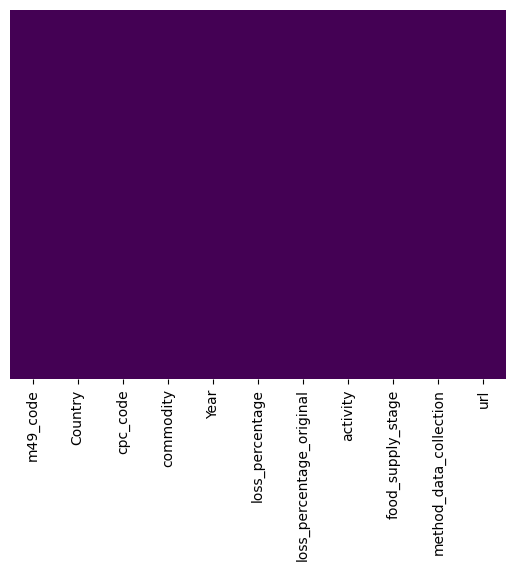

In [70]:
sns.heatmap(df_fao.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Merge com pandas
Aqui vamos fazer o merge dos datasets e verificar o seu tempo

### Pandas merge

In [71]:
start_time = time.time()

df1 = pd.merge(df_agroFood, df_foodEmissions, on=['Country', 'Year'], how='inner')
df2 = pd.merge(df1, df_globalFood, on=['Country', 'Year'], how='inner')
dfinal = pd.merge(df2, df_fao, on=['Country', 'Year'], how='inner')
# dfinal: info entre 2010-2020

elapsed_time = time.time() - start_time

# Exiba o resultado e o tempo decorrido
print(f"Tempo decorrido para o merge: {elapsed_time:.6f} segundos")

Tempo decorrido para o merge: 3.225715 segundos


### PySpark merge

In [73]:
# Crie uma sessão Spark
spark = SparkSession.builder.appName("merge_example").getOrCreate()

# Carregue os DataFrames PySpark
df_agroFood_spark = spark.createDataFrame(df_agroFood)
df_foodEmissions_spark = spark.createDataFrame(df_foodEmissions)
df_globalFood_spark = spark.createDataFrame(df_globalFood)
df_fao_spark = spark.createDataFrame(df_fao)

# Inicie o cronômetro
start_time = time.time()

# Realize os merges usando PySpark
df1_spark = df_agroFood_spark.join(df_foodEmissions_spark, ['Country', 'Year'], 'inner')
df2_spark = df1_spark.join(df_globalFood_spark, ['Country', 'Year'], 'inner')
dfinal_spark = df2_spark.join(df_fao_spark, ['Country', 'Year'], 'inner')

# Pare o cronômetro
elapsed_time_pyspark = time.time() - start_time

#dfinal_spark.show()
print(f"Tempo decorrido para o merge (PySpark): {elapsed_time_pyspark:.6f} segundos")

# Pare a sessão Spark
spark.stop()

Tempo decorrido para o merge (PySpark): 0.058799 segundos


In [74]:
df_agroFood

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,0.0000,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,0.0000,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,0.0000,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,0.0000,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [75]:
df_foodEmissions

,Country,Item,Element,Unit,Year,Food_emissions
1116735,Afghanistan,LULUCF,Emissions (CO2),kilotonnes,2019,154.6574
1116737,Afghanistan,LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2019,0.0000
1116738,Afghanistan,LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,2019,0.0000
1116739,Afghanistan,LULUCF,Emissions (CO2eq) (AR5),kilotonnes,2019,154.6574
1116741,Afghanistan,AFOLU,Emissions (CH4),kilotonnes,2019,408.9114
...,...,...,...,...,...,...
1049446,Zimbabwe,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,2017,108.6262
1049444,Zimbabwe,Crop Residues,Emissions (N2O),kilotonnes,2017,0.4099
1049443,Zimbabwe,Crop Residues,Indirect emissions (N2O),kilotonnes,2017,0.0753
1049442,Zimbabwe,Crop Residues,Direct emissions (N2O),kilotonnes,2017,0.3346


In [76]:
df_globalFood

,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,Afghanistan,2010,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
50,Afghanistan,2011,29249156.0,762948.50,0.026084,26.084462,10.309299,74006.0,0.002530,25.301927,127000.0,0.004342,4.342006,73000.0,0.002496,2.495799,1274000.0,0.043557,43.556813,1146000.0,0.039181,39.180618,129000.0,0.004410,4.410384,39.178970,107.339643,24.712097,1.081154,0.175044
51,Afghanistan,2012,30466484.0,817743.50,0.026841,26.840758,10.229700,79938.0,0.002624,26.238014,97000.0,0.003184,3.183827,28000.0,0.000919,0.919043,1301000.0,0.042703,42.702664,1174000.0,0.038534,38.534150,127000.0,0.004169,4.168515,38.538956,105.586180,24.547106,1.104620,0.184103
52,Afghanistan,2013,31541216.0,790266.94,0.025055,25.055056,10.026000,78821.0,0.002499,24.989840,122000.0,0.003868,3.867955,37000.0,0.001173,1.173068,1231000.0,0.039028,39.028298,1117000.0,0.035414,35.413980,117000.0,0.003709,3.709432,35.419920,97.040876,22.508327,1.053799,0.173928
53,Afghanistan,2014,32716214.0,973721.60,0.029763,29.762663,9.740900,99962.0,0.003055,30.554270,323000.0,0.009873,9.872780,68000.0,0.002078,2.078480,1792000.0,0.054774,54.774065,1630000.0,0.049822,49.822390,167000.0,0.005105,5.104503,49.817490,136.486273,33.660465,1.560622,0.265204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14056,Zimbabwe,2016,14452705.0,230240.77,0.015931,15.930634,6.847900,33622.0,0.002326,23.263465,9000.0,0.000623,0.622721,1000.0,0.000069,0.069191,238000.0,0.016468,16.467506,219000.0,0.015153,15.152873,19000.0,0.001315,1.314633,15.173219,41.570463,10.678529,0.572757,0.087370
14057,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.714000,34648.0,0.002349,23.488416,6000.0,0.000407,0.406749,2000.0,0.000136,0.135583,238000.0,0.016134,16.134389,220000.0,0.014914,14.914141,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.601300,35756.0,0.002375,23.754681,3000.0,0.000199,0.199307,5000.0,0.000332,0.332178,236000.0,0.015679,15.678780,219000.0,0.014549,14.549376,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.667800,35020.0,0.002281,22.807490,1000.0,0.000065,0.065127,6000.0,0.000391,0.390762,224000.0,0.014588,14.588457,207000.0,0.013481,13.481297,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305


In [57]:
df_fao

,m49_code,Country,region,cpc_code,commodity,Year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
7,108,Burundi,NaN,0111,Wheat,2020,3.50,3.5,NaN,"Shelling, Threshing",Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
8,108,Burundi,NaN,0111,Wheat,2020,4.87,4.87,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
9,108,Burundi,NaN,0111,Wheat,2020,2.50,2.5,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
10,108,Burundi,NaN,0111,Wheat,2020,4.43,4.43,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
11,108,Burundi,NaN,0112,Maize (corn),2020,4.00,4,NaN,Drying,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27427,894,Zambia,NaN,0118,Millet,2010,3.45,3.45,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27428,894,Zambia,NaN,0118,Millet,2010,1.00,1,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27429,894,Zambia,NaN,0118,Millet,2010,2.50,2.5,NaN,Winnowing,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27430,894,Zambia,NaN,0118,Millet,2010,2.50,2.5,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN


In [78]:
df1

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C,Item,Element,Unit,Food_emissions
0,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2eq) (AR5),kilotonnes,30446.2480
1,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,4137.5809
2,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2),kilotonnes,8630.0000
3,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,LULUCF,Emissions (CH4),kilotonnes,0.0000
4,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,LULUCF,Emissions (N2O),kilotonnes,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425677,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.00000,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.675400,1134.1634,307.414500,1227.240253,940.4200,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.18900,Food Packaging,Emissions (CH4),kilotonnes,0.0032
425678,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.00000,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.675400,1134.1634,307.414500,1227.240253,940.4200,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.18900,Food Packaging,Emissions (N2O),kilotonnes,0.0005
425679,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.00000,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.675400,1134.1634,307.414500,1227.240253,940.4200,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.18900,Food Packaging,Emissions (CO2),kilotonnes,9.7789
425680,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.00000,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.675400,1134.1634,307.414500,1227.240253,940.4200,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.18900,On-farm electricity use,Emissions (CO2eq) (AR5),kilotonnes,218.3164


<Axes: >

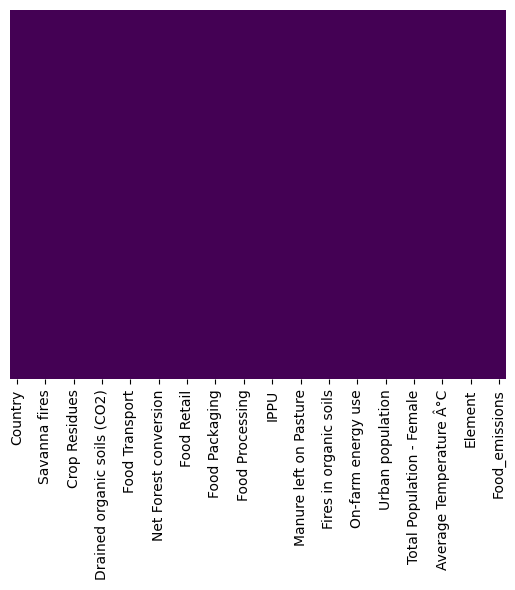

In [79]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [80]:
df2

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C,Item,Element,Unit,Food_emissions,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2eq) (AR5),kilotonnes,30446.2480,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
1,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,4137.5809,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
2,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2),kilotonnes,8630.0000,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
3,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,LULUCF,Emissions (CH4),kilotonnes,0.0000,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
4,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,142403

In [81]:
dfinal

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C,Item,Element,Unit,Food_emissions,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day),m49_code,cpc_code,commodity,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection,url
0,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2eq) (AR5),kilotonnes,30446.2480,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715,4,0111,Wheat,14.96,14.96%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...,Unknown
1,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,4137.5809,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715,4,0111,Wheat,14.96,14.96%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...,Unknown
2,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2),kilotonnes,8630.0000,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715,4,0111,Wheat,14.96,14.96%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...,Unknown
3,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,0.0000,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,LULUCF,Emissions (CH4),kilotonnes,0.0000,28189672.0,969763.10,0.034401,34.401360,10.67

In [82]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461065 entries, 0 to 2461064
Data columns (total 72 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   Country                                     object 
 1   Year                                        int64  
 2   Savanna fires                               float64
 3   Forest fires                                float64
 4   Crop Residues                               float64
 5   Rice Cultivation                            float64
 6   Drained organic soils (CO2)                 float64
 7   Pesticides Manufacturing                    float64
 8   Food Transport                              float64
 9   Forestland                                  float64
 10  Net Forest conversion                       float64
 11  Food Household Consumption                  float64
 12  Food Retail                                 float64
 13  On-farm Electricity Use    

In [63]:
dfinal.nunique()

Country                    92
Year                       11
Savanna fires             536
Forest fires              419
Crop Residues             589
                         ... 
sample_size               123
method_data_collection      9
reference                 143
url                        50
notes                     108
Length: 79, dtype: int64

In [64]:
# sns.heatmap(dfinal.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [65]:
dfinal.columns

Index(['Country', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'Emissions_food',
       'Average Temperature Â°C', 'Item', 'Element', 'Unit', 'Food_emissions',
       'Population', 'Production (t)', 'production__tonnes__per_capita',
       'Production per capita (kg)', 'Yield (t/ha)', 'Land Use (ha)',
       'area_harvested__ha__per_capita', 'La

In [66]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207347 entries, 0 to 2207346
Data columns (total 79 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   Country                                     object 
 1   Year                                        int64  
 2   Savanna fires                               float64
 3   Forest fires                                float64
 4   Crop Residues                               float64
 5   Rice Cultivation                            float64
 6   Drained organic soils (CO2)                 float64
 7   Pesticides Manufacturing                    float64
 8   Food Transport                              float64
 9   Forestland                                  float64
 10  Net Forest conversion                       float64
 11  Food Household Consumption                  float64
 12  Food Retail                                 float64
 13  On-farm Electricity Use    